In [ ]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Checking the compiled dataset
ovp_df = pd.read_csv('Compiled_OVP_funds.csv')
ovp_df = ovp_df.drop(ovp_df.columns[1:141], axis = 1)
ovp_df.head(5)

Content
0  The Makabayan bloc members of the House of Rep...
1  Senator Risa Hontiveros  calls for a Senate  p...
2  The Department of Education's finance unit is ...
3  Senator Risa Hontiveros calls for a Senate pro...
4  HINDI PWEDENG MAGHUGAS KAMAY'\n\nSen. Risa Hon...

In [ ]:
''' Creating another column to count number of words per document
    Some rows have NaN values and are dropped for the purpose of
    describing the dataset.
'''
ovp_df = ovp_df.dropna()
ovp_df['word_count'] = ovp_df['Content'].apply(lambda x: len(x.split()))
ovp_df['word_count'].describe()

count    3879.000000
mean       58.931168
std       157.465923
min         1.000000
25%         8.000000
50%        23.000000
75%        43.000000
max      2617.000000
Name: word_count, dtype: float64

In [ ]:
ovp_df.shape

(3879, 2)

In [ ]:
# Showing the vocabulary size of the corpora
vocab = Counter(" ".join(ovp_df['Content']).split())
print(f"Vocabulary size: {len(vocab)}")

Vocabulary size: 30308


president       2782
duterte         2751
vice            2353
sara            2208
budget          1969
funds           1913
confidential    1691
ovp             1679
sa              1496
ng              1493
na              1436
office          1272
ang             1220
said            1057
vp               975
million          936
house            673
education        666
mga              595
2022             582
dtype: int64


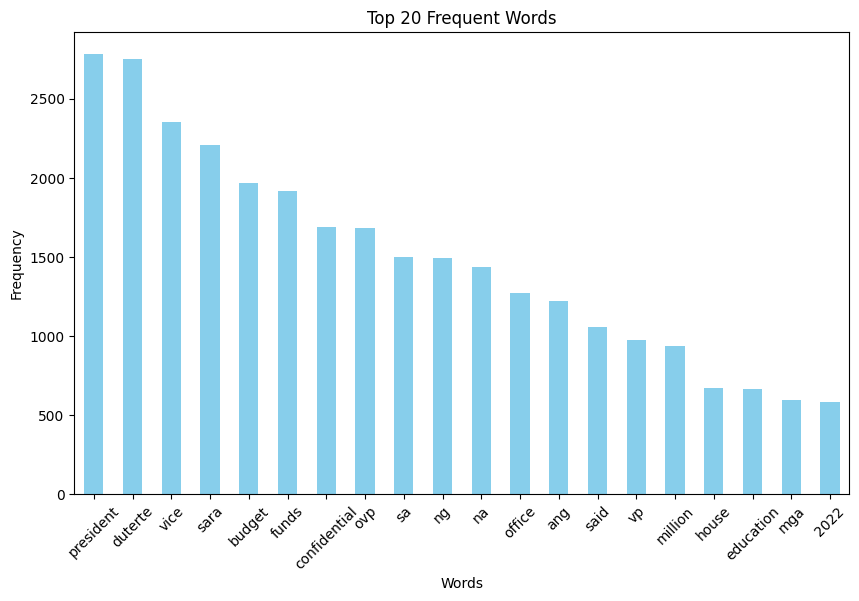

In [ ]:
import matplotlib.pyplot as plt
# Displaying the top n most frequent words in the dataset:

def n_frequent_words(df, n = 10):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(df['Content'])

    # Create a DataFrame of word frequencies
    word_freq = pd.DataFrame(X.toarray(),
                             columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

    # Print the top n frequent words
    print(word_freq.head(n))

    # Plotting the top n frequent words
    plt.figure(figsize=(10, 6))
    word_freq.head(n).plot(kind='bar', color='skyblue')
    plt.title(f'Top {n} Frequent Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Call the function
n_frequent_words(ovp_df, 20)

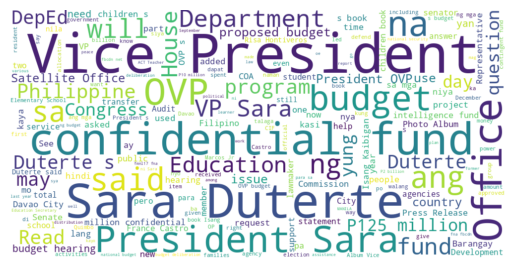

In [ ]:
# Using word cloud for visualizing most frequently occurring words
ovp_wordcloud = WordCloud(width = 1000,
                      height = 500,
                      background_color = 'white').generate(' '.join(ovp_df['Content']))
plt.imshow(ovp_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

sara            149.049178
president       136.121595
duterte         131.402050
budget          119.414509
vp              119.292511
ng              110.957223
na              109.247975
sa              109.064791
vice            107.075538
funds           100.750194
ang              96.824770
confidential     95.789090
ovp              79.299495
office           61.378533
mga              55.377889
million          51.688265
book             50.982076
yan              43.704283
ni               40.857209
education        39.748904
dtype: float64


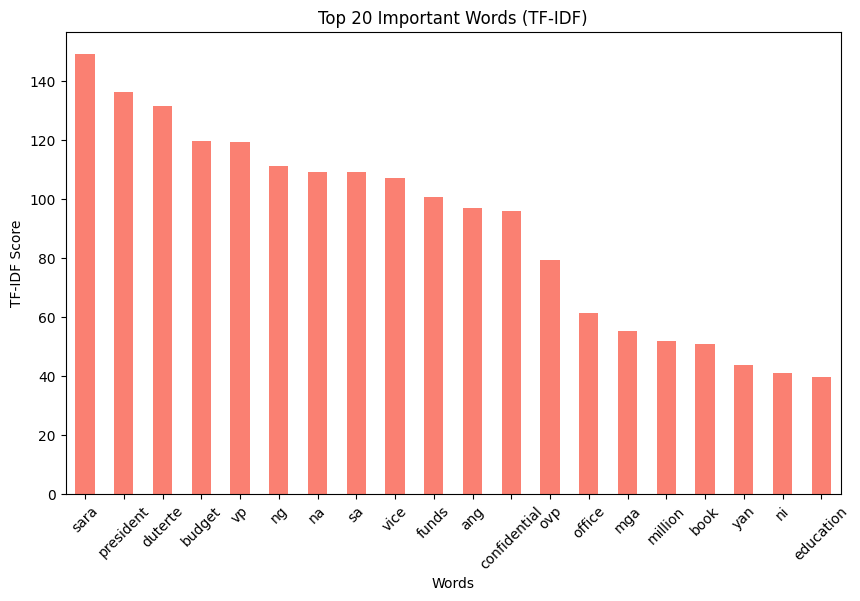

In [ ]:
# Uses TFIDF to show important words based on tfidf scores
def n_important_words(df, n = 10):
    ovp_vectorizer = TfidfVectorizer(stop_words='english')
    X = ovp_vectorizer.fit_transform(df['Content'])

    # Create a DataFrame of TF-IDF scores
    tfidf_scores = pd.DataFrame(X.toarray(),
                                columns=ovp_vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

    # Print the top n important words
    print(tfidf_scores.head(n))

    # Plotting the top n important words
    plt.figure(figsize=(10, 6))
    tfidf_scores.head(n).plot(kind='bar', color='salmon')
    plt.title(f'Top {n} Important Words (TF-IDF)')
    plt.xlabel('Words')
    plt.ylabel('TF-IDF Score')
    plt.xticks(rotation=45)
    plt.show()

# Call the function
n_important_words(ovp_df, 20)